In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

自回归模型：
单变量时间序列： 仅相关关系
**eg**:
AR（1）最大似然估计

AR（p） 估计滞后期p：
1.由大到小的序贯t规则
2.使用信息准则：AIC，BIC准则等
结合以上两种方法确定p，二者若不一致，取二者滞后阶数大者

最大似然估计原理：
若regression 存在非线性，常采用最大似然估计（MLE） 或 非线性最小二乘（NLS）
随机抽取样本去估计theta

In [3]:
df = pd.read_excel('/Users/lihaohan/因子选股/人工智能选股/intern/统计学习/计量经济学/上证指数与沪深300.xlsx')
df.head()

,日期,hs300,sz
0,2018-01-02,4087.4012,3348.3259
1,2018-01-03,4111.3925,3369.1084
2,2018-01-04,4128.8119,3385.7102
3,2018-01-05,4138.7505,3391.7501
4,2018-01-08,4160.1595,3409.4795


In [4]:
def ARxx(X, P):
    '''
    获取自回归的估计向量
    X - 输入数据, 列向量
    P - AR阶数, 标量
    '''
    N = len(X)
    ARx = pd.DataFrame()
    for m in range(1, P+1):
        ARx.insert(m-1, f'var_{m}', list(X[P-m:N-m]))
    ARy = list(X[P:N])

    return ARy, ARx

y, X = ARxx(df['sz'], 1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.126e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:50:22   Log-Likelihood:                -2286.7
No. Observations:                 459   AIC:                             4577.
Df Residuals:                     457   BIC:                             4586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1999     19.891      1.971      0.049       0.111      78.288
var_1          0.9863      0.007    145.803      0.000       0.973       1.000
==============================================================================
Omnibus:                       50.265   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.067
Skew:                          -0.417   Prob(JB):                     3.94e-41
Kurtosis:                       6.006   Cond. No.                     3.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#statsmodels实现:
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(df['sz'], lags=1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     sz   No. Observations:                  460
Model:                     AutoReg(1)   Log Likelihood               -2286.658
Method:               Conditional MLE   S.D. of innovations             35.265
Date:                Sat, 08 Jun 2024   AIC                           4579.316
Time:                        11:59:22   BIC                           4591.703
Sample:                             1   HQIC                          4584.194
                                  460                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1999     19.847      1.975      0.048       0.300      78.100
sz.L1          0.9863      0.007    146.121      0.000       0.973       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0139           +0.0000j            1.0139            0.0000
-----------------------------------------------------------------------------
"""

移动平均模型(MA)
条件MLE估计，即在给定爱普西诺_0=0的条件下，最大化样本数据的似然函数

In [11]:
from statsmodels.tsa.arima.model import ARIMA
#order: AR部分的阶数, 差分的阶数, MA部分的阶数
res = ARIMA(df['sz'], order=(0,0,1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     sz   No. Observations:                  460
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2897.310
Date:                Sat, 08 Jun 2024   AIC                           5800.620
Time:                        12:53:42   BIC                           5813.014
Sample:                             0   HQIC                          5805.501
                                - 460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2930.3212     12.062    242.936      0.000    2906.680    2953.963
ma.L1          0.9395      0.020     46.231      0.000       0.900       0.979
sigma2      1.723e+04   1355.477     12.712      0.000    1.46e+04    1.99e+04
===================================================================================
Ljung-Box (L1) (Q):                 318.03   Jarque-Bera (JB):                 9.68
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.16   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***ARMA Model***
将AR模型和MA模型结合起来
条件MLE估计
如何确定参数p,q:
考察数据的ACF和PACF

In [10]:
from statsmodels.tsa.arima.model import ARIMA
res = ARIMA(df['sz'], order=(1,0,1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     sz   No. Observations:                  460
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2294.831
Date:                Sat, 08 Jun 2024   AIC                           4597.663
Time:                        12:53:23   BIC                           4614.188
Sample:                             0   HQIC                          4604.170
                                - 460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2930.2529    126.164     23.226      0.000    2682.977    3177.529
ar.L1          0.9902      0.007    148.001      0.000       0.977       1.003
ma.L1          0.0015      0.047      0.031      0.975      -0.090       0.093
sigma2      1250.1930     53.508     23.365      0.000    1145.319    1355.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               189.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.42
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***自回归分布滞后模型***
ADL(p,q)
滞后期数选择：最小化AIC或BIC， 或使用t，F检验来检验最后期系数的显著性
可以在ARMA模型中引入其他变量，称为ARMAX模型
PS: statsmodels库貌似没有这个模型

In [16]:
Y = df['hs300']
X = df['sz']

def lag_list(Y, X, p=1, q=1):
    '''
    待估计的方程: y = c + y(-1) + .... + y(-p) + x(-1) + ... + x(-q)
    获取自回归分布滞后模型的估计向量
    
    Parameters:
    --------------
    Y: 被估计变量
    X: 估计变量
    p: ADL模型 Y 的滞后阶数
    q: ADL模型 X 的滞后阶数

    Returns:
    ---------------
    ADLy: ADL模型被解释变量
    ADLx: ADL模型解释变量
    '''
    ADLx = pd.DataFrame()
    T = len(Y)
    ADLy = list(Y[max(p,q):T])

    for i in range(1, p+1):
        name = f'y_{i}'
        ADLx[name] = list(Y[max(p,q)-i:T-i])
    for i in range(1, q+1):
        name = f'x_{i}'
        ADLx[name] = list(X[max(p,q)-i:T-i])

    return ADLy, ADLx

ADLy, ADLx = lag_list(Y, X, p=2, q=2)
ADLx = sm.add_constant(ADLx)
model = sm.OLS(ADLy, ADLx)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     5540.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:24:34   Log-Likelihood:                -2414.2
No. Observations:                 458   AIC:                             4838.
Df Residuals:                     453   BIC:                             4859.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2565     26.908      1.979      0.048       0.376     106.137
y_1            1.7194      0.202      8.511      0.000       1.322       2.116
y_2           -0.7140      0.203     -3.517      0.000      -1.113      -0.315
x_1           -1.0193      0.274     -3.727      0.000      -1.557      -0.482
x_2            0.9939      0.275      3.620      0.000       0.454       1.534
==============================================================================
Omnibus:                       28.071   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.486
Skew:                          -0.167   Prob(JB):                     2.73e-19
Kurtosis:                       5.090   Cond. No.                     8.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***VAR Model***
多变量时间序列 - VAR(p)
滞后阶数?几个变量?：
**滞后阶数：**
信息准则：
残差的协方差矩阵 -> 计算AIC,BIC

检验最后一阶系数的显著性:
比如要确定使用VAR(p)还是VAR(p-1),则可以检验原假设H_0：下标为p的参数=0

检验VAR model的残差是否是白噪声：
即是否存在自相关。如果真实模型为 VAR( p ) ,但被错误地设置为 Var(p−1), 则解释变量的最后一阶滞后 yt−p 被纳入扰动项 εt,，导致扰动项出现自相关。更糟糕的是，由于 yt−p 的相关性, 包含 yt−p 的扰动项 εt 将与解释变量 {yt−1,⋯yt−(p−1)} 相关, 导致 OLS 估计不一致。为此,需要检验 VAR 模型的残差是否存在自相关。如果存在自相关,则可能意味着应该在解释变量中加入更高阶的滞后变量。

**变量个数的选择：**
脉冲响应函数
脉冲响应函数的缺点是,它假定在计算 ( ∂yi,t+s/∂εjt) 时,只让 εjt 变动，而所有其他同期扰动项均不变。此假定只有当扰动项的协方差矩阵 Σ≡E(εtε′t) 为对角矩阵时才成立（即同期扰动项之间正交）;否则，当 εjt 变动时，必然伴随着其他方程的同期扰动项发生相应的变动。为此,需要 考虑“正交化的脉冲响应函数”( Orthogonalized Impulse Response Function,简记 OIRF)，即从扰动项 εt 中分离出相互正交的部分,记为 ut, 然后计算当 ut 中的某个分量变动时,对各变量在不时期的影响。

In [17]:
Y = df['hs300']
X = df['sz']

def lag_list(Y, X, p=1, q=1):
    '''
    待估计的方程: y = c + y(-1) + .... + y(-p) + x(-1) + ... + x(-q)
    获取自回归分布滞后模型的估计向量
    
    Parameters:
    --------------
    Y: 被估计变量
    X: 估计变量
    p: ADL模型 Y 的滞后阶数
    q: ADL模型 X 的滞后阶数

    Returns:
    ---------------
    ADLy: ADL模型被解释变量
    ADLx: ADL模型解释变量
    '''
    ADLx = pd.DataFrame()
    T = len(Y)
    ADLy = list(Y[max(p,q):T])

    for i in range(1, p+1):
        name = f'y_{i}'
        ADLx[name] = list(Y[max(p,q)-i:T-i])
    for i in range(1, q+1):
        name = f'x_{i}'
        ADLx[name] = list(X[max(p,q)-i:T-i])

    return ADLy, ADLx

def VAR(Y, X, lag):
    ADLy, ADLx = lag_list(Y, X, p=lag, q=lag)
    ADLx = sm.add_constant(ADLx)
    model = sm.OLS(ADLy, ADLx)
    a = model.fit().params
    ADLy, ADLx = lag_list(X, Y, p=lag, q=lag)
    ADLx = sm.add_constant(ADLx)
    model = sm.OLS(ADLy, ADLx)
    b = model.fit().params

    return pd.DataFrame([a, b])

VAR(Y, X, 2)

,const,y_1,y_2,x_1,x_2
0,53.256500,1.719442,-0.714049,-1.019274,0.993932
1,39.431266,0.241814,0.738772,0.564473,-0.560130


In [18]:
# statsmodels
from statsmodels.tsa.vector_ar.var_model import VAR

estimate_data = df[['sz', 'hs300']]
res = VAR(estimate_data).fit(maxlags=5, method='ols', ic='bic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Jun, 2024
Time:                     17:28:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.9914
Nobs:                     458.000    HQIC:                   11.9368
Log likelihood:          -4015.14    FPE:                    147453.
AIC:                      11.9013    Det(Omega_mle):         144286.
--------------------------------------------------------------------
Results for equation sz
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           39.431266        19.842955            1.987           0.047
L1.sz            0.241814         0.201697            1.199           0.231
L1.hs300         0.564473         0.148984            3.789           0.000
L2.sz  

对上证指数的脉冲示意图


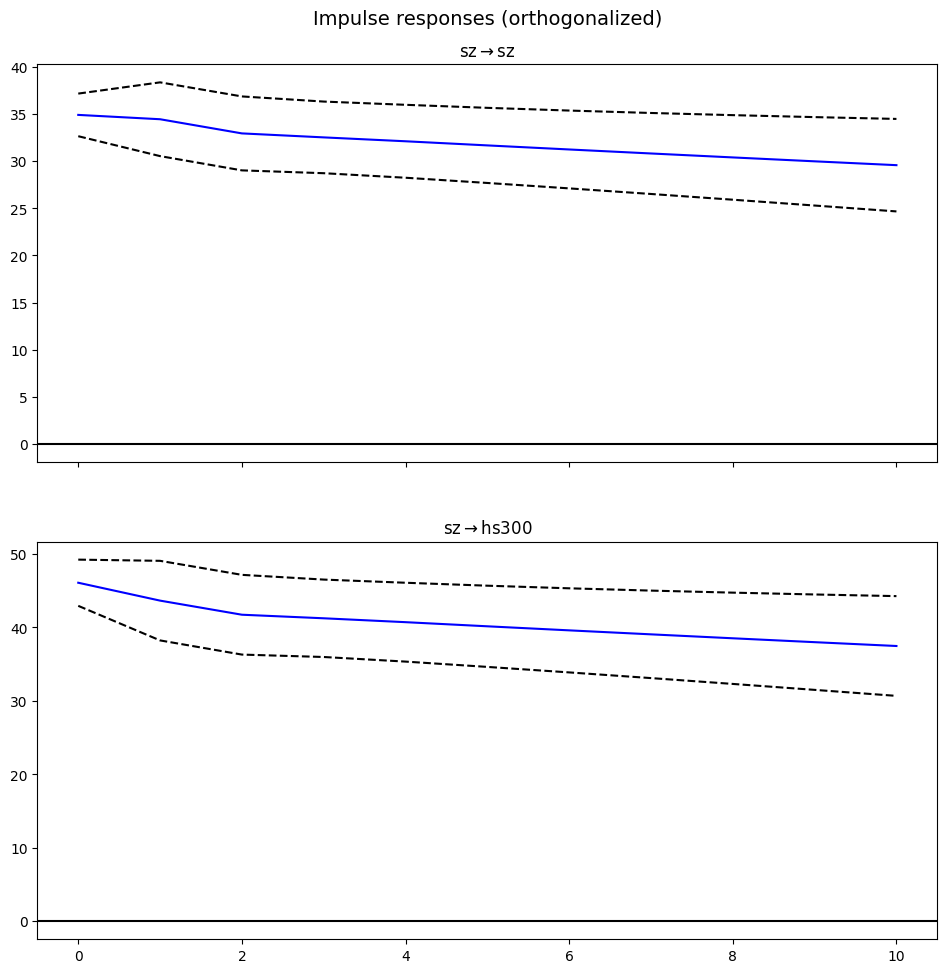

In [19]:
# 脉冲响应分析
irf = res.irf()

fig = irf.plot(orth=True, impulse='sz')
print('对上证指数的脉冲示意图')

***Granger因果检验***
常在一个二元VAR系统进行Granger因果检验
仅适用于平稳序列，或有协整关系的单位根过程
对于不存在协整关系关系的单位根变量，则只能先差分，得到平稳序列后再检验
ref：https://zhuanlan.zhihu.com/p/563637284
https://blog.csdn.net/lucialucia/article/details/120122896

Wald检验 - 自回归分布滞后model


In [20]:
import re
Y = df['hs300']
X = df['sz']


def lag_list(Y, X, p=1, q=1):
    '''
    待估计的方程: y = c + y(-1) + .... + y(-p) + x(-1) + ... + x(-q)
    获取自回归分布滞后模型的估计向量
    
    Parameters:
    --------------
    Y: 被估计变量
    X: 估计变量
    p: ADL模型 Y 的滞后阶数
    q: ADL模型 X 的滞后阶数

    Returns:
    ---------------
    ADLy: ADL模型被解释变量
    ADLx: ADL模型解释变量
    '''
    ADLx = pd.DataFrame()
    T = len(Y)
    ADLy = list(Y[max(p,q):T])

    for i in range(1, p+1):
        name = f'y_{i}'
        ADLx[name] = list(Y[max(p,q)-i:T-i])
    for i in range(1, q+1):
        name = f'x_{i}'
        ADLx[name] = list(X[max(p,q)-i:T-i])

    return ADLy, ADLx


p = 2
q = 2
ADLy, ADLx = lag_list(Y, X, p, q)
ADLx = sm.add_constant(ADLx)
model = sm.OLS(ADLy, ADLx)
res = model.fit()

In [21]:
ADLx

,const,y_1,y_2,x_1,x_2
0,1.0,4111.3925,4087.4012,3369.1084,3348.3259
1,1.0,4128.8119,4111.3925,3385.7102,3369.1084
2,1.0,4138.7505,4128.8119,3391.7501,3385.7102
3,1.0,4160.1595,4138.7505,3409.4795,3391.7501
4,1.0,4189.2977,4160.1595,3413.8996,3409.4795
...,...,...,...,...,...
453,1.0,3877.0892,3905.8570,2891.3431,2909.8697
454,1.0,3907.9291,3877.0892,2909.2002,2891.3431
455,1.0,3947.0392,3907.9291,2933.9908,2909.2002
456,1.0,3907.8641,3947.0392,2911.0534,2933.9908


In [31]:
wald = ''
for i, value in enumerate(ADLx):
    if i < p:
        wald += f'{value}='
wald = wald + '0'
wald = str(res.f_test(wald))
#walds = float(re.findall('array\(\[\[(.*?)\]\]', wald)[0])
wald


'<F test: F=38.5270955548406, p=3.529400689421999e-16, df_denom=453, df_num=2>'

***ARCH model***
时序数据存在“自回归条件异方差”
波动性聚集现象

MLE估计
arch检验

In [34]:
from arch import arch_model
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl

In [33]:
df['sz_return'] = 100 * np.log(df['sz'] / df['sz'].shift(1))
df.dropna(inplace=True)

/Users/lihaohan/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  func(*args, **kwargs)
/Users/lihaohan/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/Users/lihaohan/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  func(*args, **kwargs)
/Users/lihaohan/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  func(*args, **kwargs)
/Users/lihaohan/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/Users/lihaohan

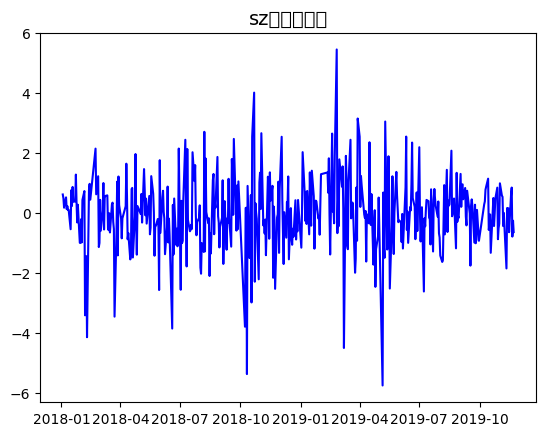

In [35]:
plt.title('sz指数收益率', fontsize=14)
plt.plot(df['日期'], df['sz_return'], color='b')

In [36]:
model_arch = arch_model(y=df['sz_return'], mean='Constant', lags=0, vol='GARCH', p=1,
                        o=0, q=1, dist='normal')
res = model_arch.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1299.7178232835986
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2250.0830797287563
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3152.4351573571716
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1000.9459250946966
Iteration:      5,   Func. Count:     38,   Neg. LLF: 729.890271354562
Iteration:      6,   Func. Count:     43,   Neg. LLF: 729.8799276640548
Iteration:      7,   Func. Count:     48,   Neg. LLF: 729.877665458991
Iteration:      8,   Func. Count:     53,   Neg. LLF: 729.8769035252819
Iteration:      9,   Func. Count:     58,   Neg. LLF: 729.8768999003057
Iteration:     10,   Func. Count:     62,   Neg. LLF: 729.876899900277
Optimization terminated successfully    (Exit mode 0)
            Current function value: 729.8768999003057
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              sz_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -729.877
Distribution:                  Normal   AIC:                           1467.75
Method:            Maximum Likelihood   BIC:                           1484.27
                                        No. Observations:                  459
Date:                Sat, Jun 08 2024   Df Residuals:                      458
Time:                        19:30:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0321  5.253e-02     -0.612      0.541 [ -0.135,7.082e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0703  5.410e-02      1.300      0.194 [-3.571e-02,  0.176]
alpha[1]       0.0631  3.519e-02      1.792  7.306e-02 [-5.895e-03,  0.132]
beta[1]        0.8921  5.544e-02     16.090  2.996e-58    [  0.783,  1.001]
===========================================================================

Covariance estimator: robust
"""

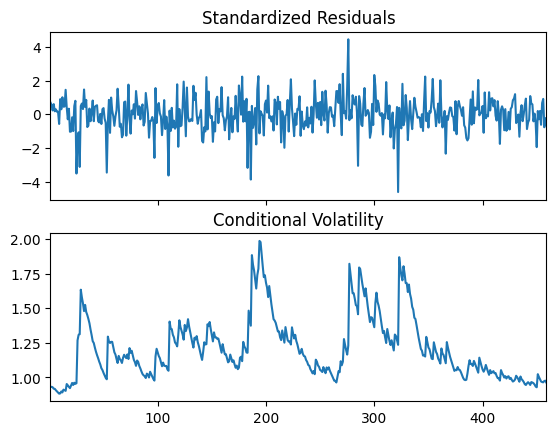

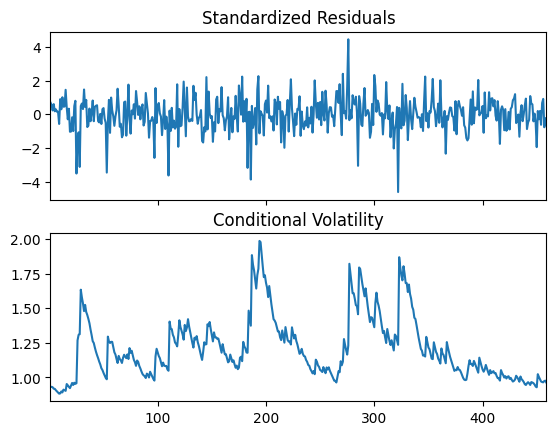

In [37]:
res.plot()

***Garch Model***
GARCH(p,q): p - 自回归阶数(ARCH项)  q - 滞后阶数(GARCH项)

何时使用ARCH or GARCH model：
一.
    1. OLS - > 残差序列
    2. OLS估计辅助回归 - > 检验原假设H0: alpha1 = alpha2.。。。= alphap = 0 即不存在条件异方差
    3. LM检验 - TR^2
    4. 若拒绝H0，则用ARCH or GARCH model
二.
    可以对残差平方序列 ∣∣e2t∣∣ 进行 Q 检验, , 检验其序列相关性。如果 {e2t} 存在自相关,则认为 εt 存在条件异方差。
三.
    最为直接的方法是,在估计 ARCH 或 GARCH 模型之后,看条件方差方程中的系数 （即所有 α 与 γ ) 是否显著


模型的拓展:
ARCH-M
TARCH
EGARCH
带ARCH的GARCH
在条件方差方程中引入解释变量
使用非正态扰动项

KS检验:
Kolmogorov-Smirnov 检验是基于累计分布函数的，用于检验一个分布是否符合某种理论分布或比较两个经验分布是否有显著差异。
单样本 K-S 检验是用来检验一个数据的观测经验分布是否符合已知的理论分布。
两样本 K-S 检验由于对两样本的经验分布函数的位置和形状参数的差异都敏感，所以成为比较两样本的最有用且最常用的非参数方法之一。

QQ图:
任何分布都能化为 [0, 1] 均匀分布
假设 FX(a)=p(x≤a) 为累积分布函数，f(x) 为概率密度函数， FX(a)=∫a−∞f(x)dx, 则存在如下等式:
P(FX(X)≤a)=P(X≤F−1X(a))=FX(F−1X(a))=a(2)
则累积分布函数 Y=FX(X) 服从 [0, 1] 间的均匀分布。

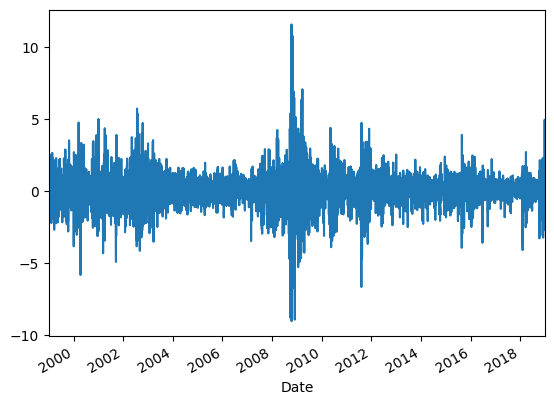

In [38]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(1988,1,1)
en = dt.datetime(2024,1,1)
data = arch.data.sp500.load()
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [39]:
from arch import arch_model

model = arch_model(y=returns, mean='Constant', lags=0, vol='GARCH',p=1,
                       o=0, q=1, dist='normal')   # 构建 GARCH（1,1)模型
res = model.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 278392203378920.22
Iteration:      2,   Func. Count:     15,   Neg. LLF: 598022682.1738641
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10200.263437386906
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7030.29277293202
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.281432022731
Iteration:      6,   Func. Count:     41,   Neg. LLF: 7051.518436525976
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6938.101874283742
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6936.742010404273
Iteration:      9,   Func. Count:     58,   Neg. LLF: 6936.71852998705
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482971
Iteration:     11,   Func. Count:     68,   Neg. LLF: 6936.718476988975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988975
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Sat, Jun 08 2024   Df Residuals:                     5029
Time:                        19:45:31   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0564  1.149e-02      4.906  9.302e-07 [3.384e-02,7.887e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0175  4.683e-03      3.738  1.854e-04 [8.328e-03,2.669e-02]
alpha[1]       0.1022  1.301e-02      7.852  4.105e-15   [7.665e-02,  0.128]
beta[1]        0.8852  1.380e-02     64.125      0.000     [  0.858,  0.912]
============================================================================

Covariance estimator: robust
"""

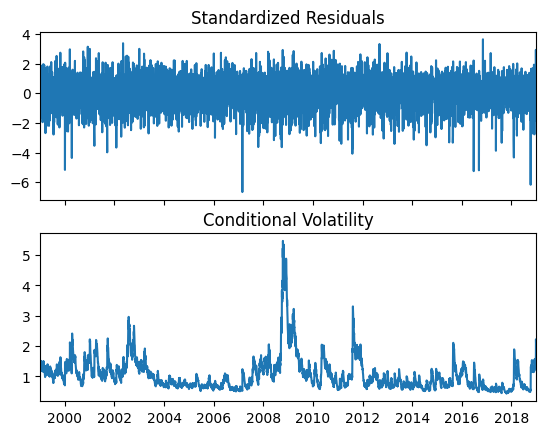

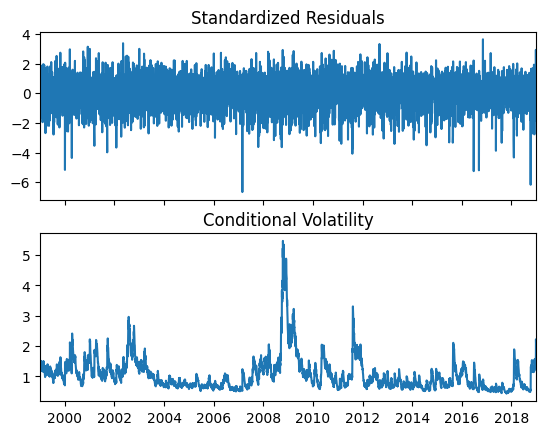

In [40]:
res.plot()